# Correlation between entropy/FD metrics

https://stochastic.readthedocs.io/en/stable/noise.html#stochastic.processes.noise.ColoredNoise

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import antropy as ant
import matplotlib.pyplot as plt
import stochastic.processes.noise as sn

sns.set(font_scale=1.25)

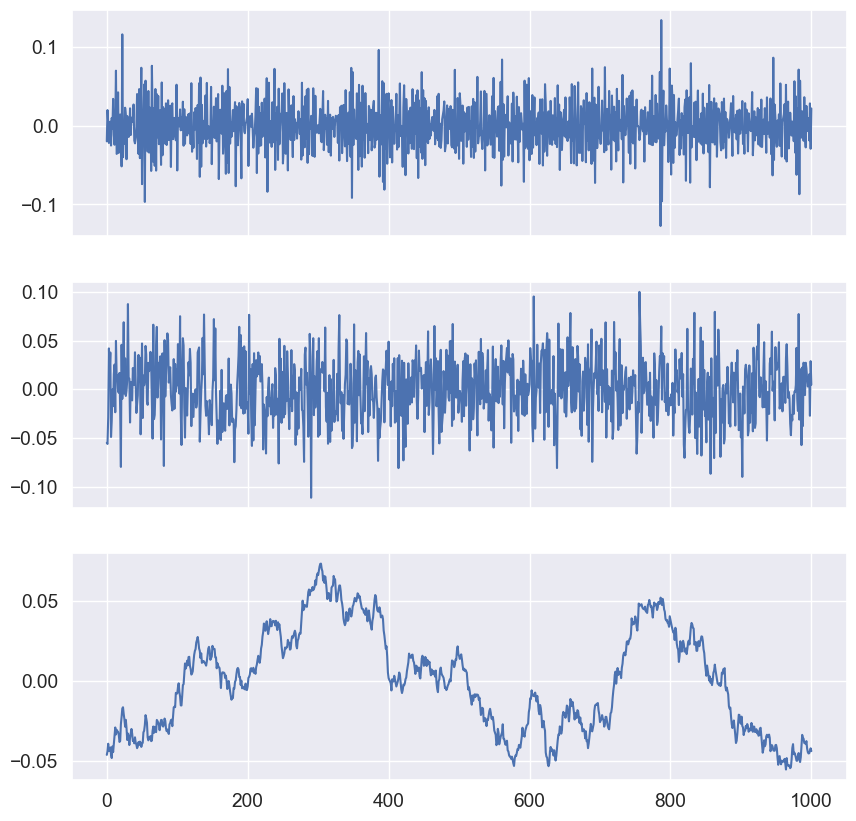

In [2]:
# Generate time-series with increasing B exponent
betas = np.arange(-2, 2.1, 0.1)
n_ts = betas.size
n_samples = 1000
sf = 10
ts = np.empty((n_ts, n_samples + 1))

for i, b in enumerate(betas):
    rng = np.random.default_rng(42)
    ts[i] = sn.ColoredNoise(beta=b, rng=rng).sample(n_samples)

# Plot the first, center and last time-series
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10), sharex=True, sharey=False)
ax1.plot(ts[0])  # Violet noise
ax2.plot(ts[int(n_ts / 2)])  # White noise
ax3.plot(ts[-1]);  # Brownian noise

In [3]:
# Compute the entropy metrics
df = []

for i in range(n_ts):
    df.append(
        {
            "PermEnt": ant.perm_entropy(ts[i], order=3, normalize=True),
            "SVDEnt": ant.svd_entropy(ts[i], order=3, normalize=True),
            "SpecEnt": ant.spectral_entropy(ts[i], sf, normalize=True, method="welch", nperseg=50),
            "AppEnt": ant.app_entropy(ts[i], order=2),
            "SampleEnt": ant.sample_entropy(ts[i], order=2),
            "PetrosianFD": ant.petrosian_fd(ts[i]),
            "KatzFD": ant.katz_fd(ts[i]),
            "HiguchiFD": ant.higuchi_fd(ts[i]),
            "DFA": ant.detrended_fluctuation(ts[i]),
        },
    )

df = pd.DataFrame(df)
df.head().round(3)

,PermEnt,SVDEnt,SpecEnt,AppEnt,SampleEnt,PetrosianFD,KatzFD,HiguchiFD,DFA
0,0.989,0.922,0.871,1.599,1.913,1.040,5.636,2.068,0.069
1,0.994,0.934,0.886,1.589,1.907,1.039,6.878,2.066,0.083
2,0.989,0.936,0.888,1.614,1.989,1.040,7.781,2.069,0.094
3,0.987,0.929,0.879,1.597,1.925,1.040,8.419,2.067,0.088
4,0.992,0.943,0.899,1.614,2.005,1.039,9.216,2.064,0.107


In [4]:
# Describe
df.agg(["min", "median", "max"]).round(2).T

,min,median,max
PermEnt,0.95,0.99,1.00
SVDEnt,0.34,0.95,1.00
SpecEnt,0.49,0.92,0.99
AppEnt,0.39,1.63,1.68
SampleEnt,0.36,2.01,2.24
PetrosianFD,1.03,1.04,1.04
KatzFD,1.84,5.32,9.22
HiguchiFD,1.48,1.99,2.07
DFA,0.07,0.55,1.52


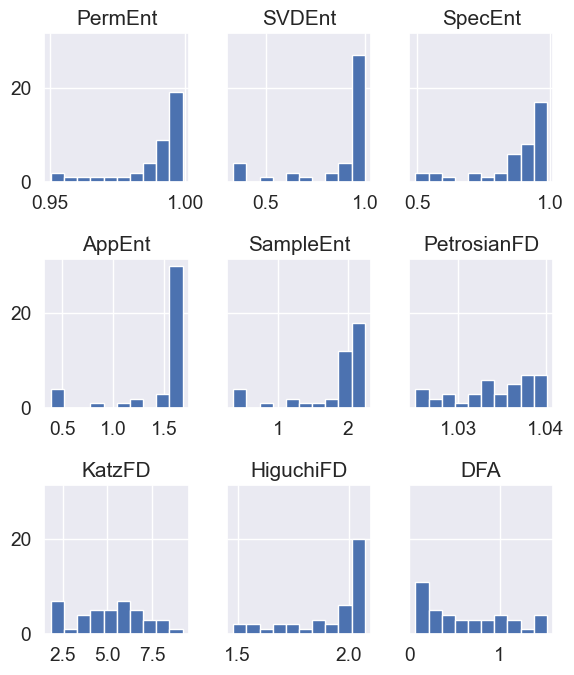

In [5]:
# Distribution
df.hist(figsize=(6, 7), layout=(3, 3), sharey=True)
plt.tight_layout()

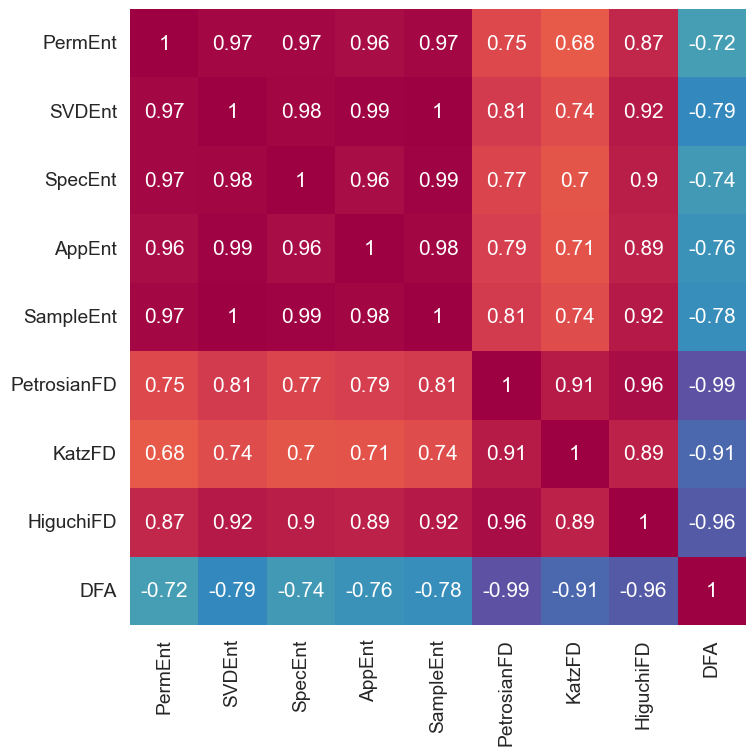

In [6]:
plt.figure(figsize=(8, 8))
sns.heatmap(
    df.corr().round(2), annot=True, vmin=-1, vmax=1, cbar=False, cmap="Spectral_r", square=True
);

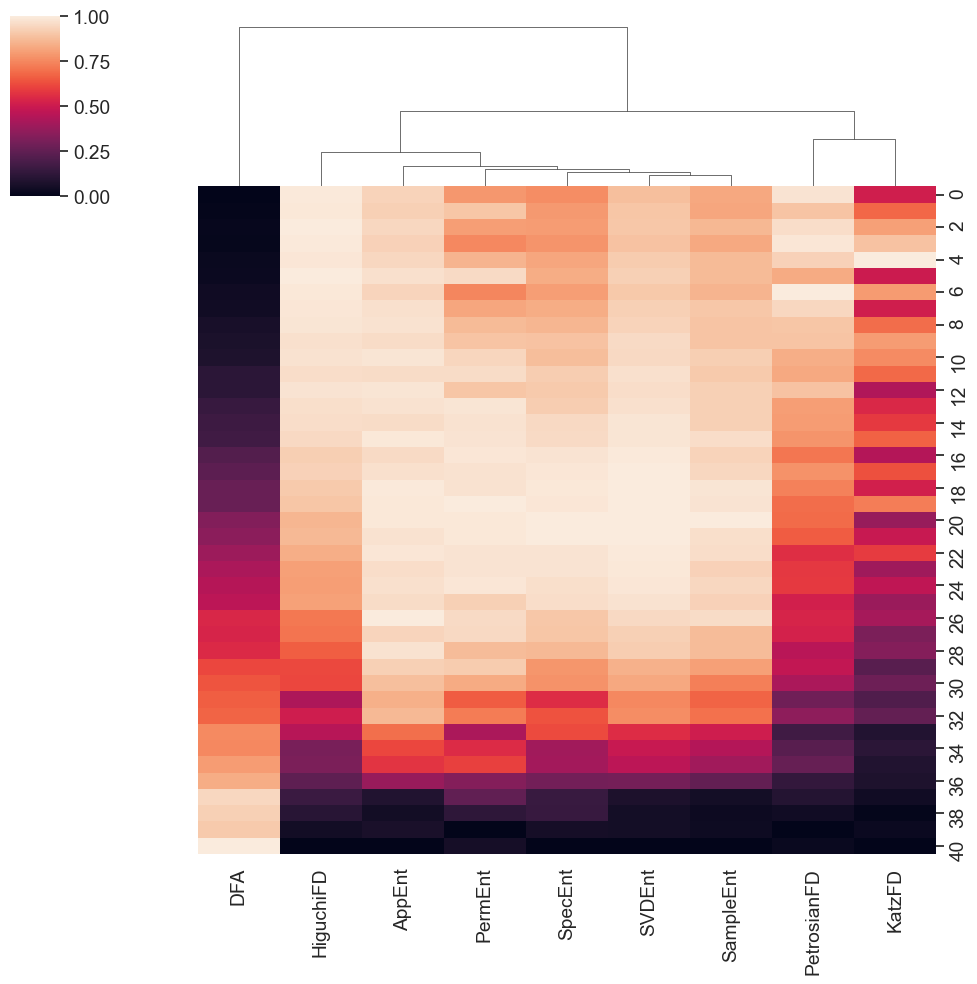

In [7]:
sns.clustermap(df.interpolate(), row_cluster=False, standard_scale=1);